In [ ]:
#Author: Jonathan Loyd
#Description: Python3 Analyzing 3 Different Forms of Media
#CSE590-59 Project 3

In [1]:
from pathlib import Path
from textblob import TextBlob
from operator import itemgetter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textatistic import Textatistic
import spacy
from collections import Counter

In [2]:
# For stopword analysis
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jloyd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
"""Part 1
Select and download three texts of your choosing that represent different media or writing formats 
(for example, you could choose i. a novel, movie script, and play script or ii. a short story, poem, and novel, etc.) 
Make sure you briefly descibe your documents and explain the difference between them in a paragraph"""

# This will be in the report

'Part 1\nSelect and download three texts of your choosing that represent different media or writing formats \n(for example, you could choose i. a novel, movie script, and play script or ii. a short story, poem, and novel, etc.) \nMake sure you briefly descibe your documents and explain the difference between them in a paragraph'

In [4]:
"""Part 2 a
Compute word counts for each of your documents after excluding English stop words (and optionally, performing lemmatization)."""

# Create Text blobs of the 3 texts
fear_blob = TextBlob(Path('fear_and_loathing_hunter_thompson_novel.txt').read_text())
machina_blob = TextBlob(Path('ex_machina_movie_script.txt').read_text())
tree_blob = TextBlob(Path('giving_tree_shel_silverstein_picture_book.txt').read_text())

# Get word counts of fear and loathing then remove stop words
fear_items = fear_blob.word_counts.items()
fear_items = [item for item in fear_items if item[0] not in stopwords]

# Get word counts of ex machina then remove stop words
machina_items = machina_blob.word_counts.items()
machina_items = [item for item in machina_items if item[0] not in stopwords]

# Get word counts of giving tree then remove stop words
tree_items = tree_blob.word_counts.items()
tree_items = [item for item in tree_items if item[0] not in stopwords]

# For displaying the frequencies uncomment these 3 print statements
# print(fear_items)
# print(machina_items)
# print(tree_items)

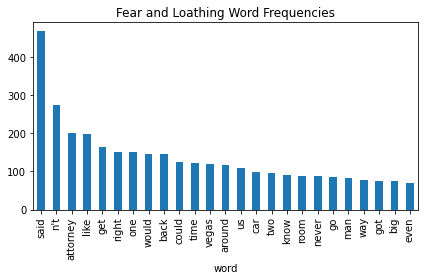

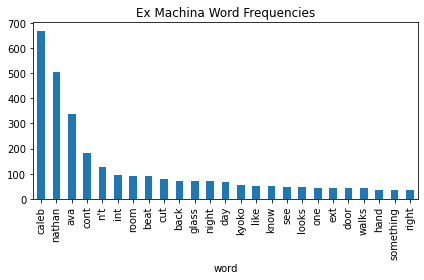

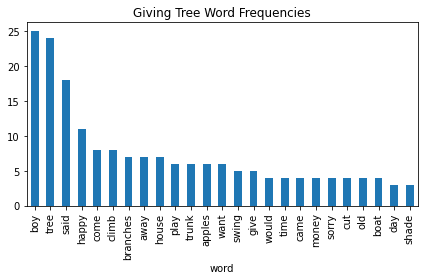

In [5]:
"""Part 2 b
Create and display a bar plot for each document that include word counts for the 25 most frequent words (after the above processing)."""

# Sort the items in descending order of frequency
fear_sorted_items = sorted(fear_items, key=itemgetter(1), reverse=True)
machina_sorted_items = sorted(machina_items, key=itemgetter(1), reverse=True)
tree_sorted_items = sorted(tree_items, key=itemgetter(1), reverse=True)

# Get the top 25 most frequent words and put them in a dataframe
fear_top25 = fear_sorted_items[:25]
fear_df = pd.DataFrame(fear_top25, columns=['word', 'count'])
machina_top25 = machina_sorted_items[:25]
machina_df = pd.DataFrame(machina_top25, columns=['word', 'count'])
tree_top25 = tree_sorted_items[:25]
tree_df = pd.DataFrame(tree_top25, columns=['word', 'count'])

# Plot and show the bar graphs
fear_df.plot.bar(x='word', y='count', legend=False)
plt.title("Fear and Loathing Word Frequencies")
plt.gcf().tight_layout()

machina_df.plot.bar(x='word', y='count', legend=False)
plt.title("Ex Machina Word Frequencies")
plt.gcf().tight_layout()

tree_df.plot.bar(x='word', y='count', legend=False)
plt.title("Giving Tree Word Frequencies")
plt.gcf().tight_layout()

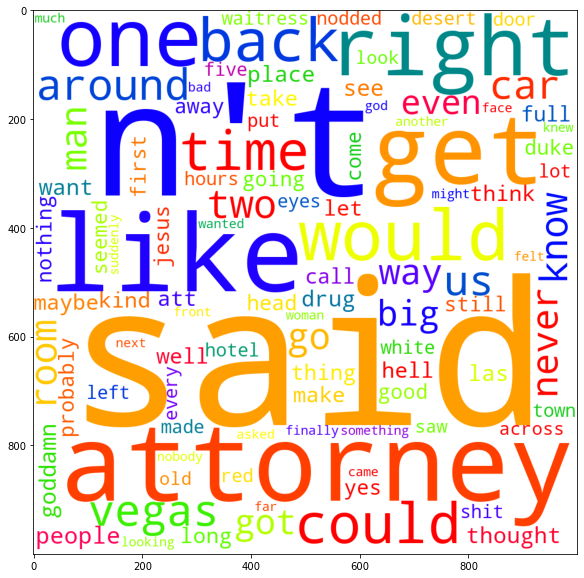

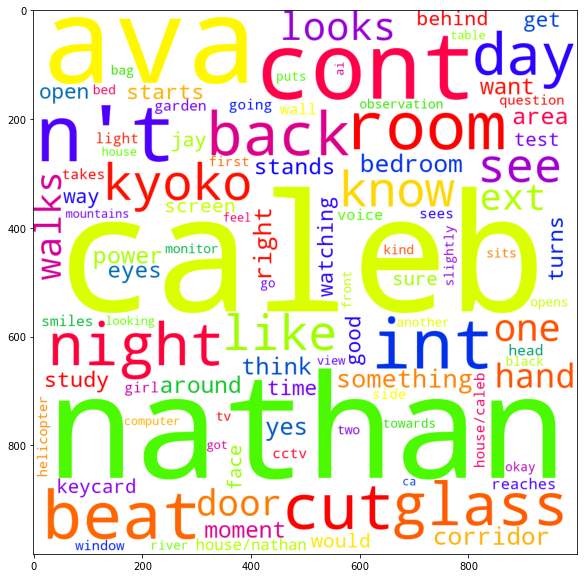

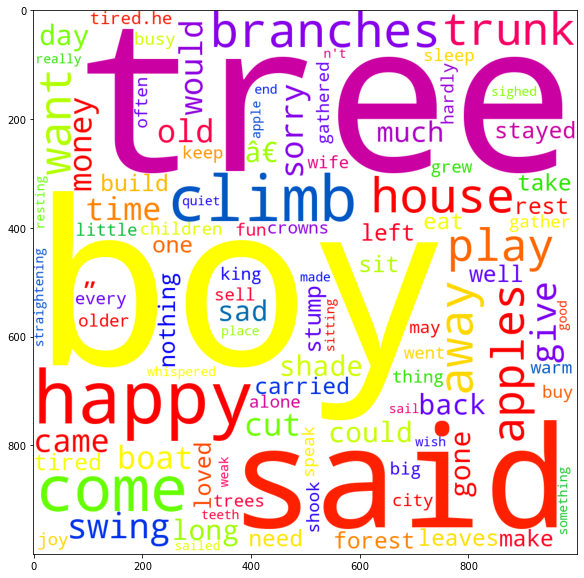

In [6]:
"""Part 2 c
Create and display a word cloud for each document (using a mask image of your choice) that includes only the 100 most frequent words."""

# The items are already sorted so we can just get the top 100 of each text
fear_100_dict = {item[0]: item[1] for item in fear_sorted_items[:100]}
machina_100_dict = {item[0]: item[1] for item in machina_sorted_items[:100]}
tree_100_dict = {item[0]: item[1] for item in tree_sorted_items[:100]}

# Configure the wordclouds and show the 3 wordclouds
fear_wordcloud = WordCloud(width=1000, height=1000,
                     colormap='prism', background_color='white')
fear_wordcloud.fit_words(fear_100_dict)
plt.figure(figsize=(10,10))
plt.imshow(fear_wordcloud)

machina_wordcloud = WordCloud(width=1000, height=1000,
                     colormap='prism', background_color='white')
machina_wordcloud.fit_words(machina_100_dict)
plt.figure(figsize=(10,10))
plt.imshow(machina_wordcloud)

tree_wordcloud = WordCloud(width=1000, height=1000,
                     colormap='prism', background_color='white')
tree_wordcloud.fit_words(tree_100_dict)
plt.figure(figsize=(10,10))
plt.imshow(tree_wordcloud)

In [7]:
"""Part 2 d
Do you see any notable difference between the documents wrt (b) and/or (c) above? 
Try to explain why or why not, and whether you would expect such a difference."""

# This will be in the report

'Part 2 d\nDo you see any notable difference between the documents wrt (b) and/or (c) above? \nTry to explain why or why not, and whether you would expect such a difference.'

In [8]:
"""Part 3 a
Use Textatistic to compute the average of the Flesch–Kincaid, Gunning Fog, SMOG, and Dale–Chall scores for each document."""

# Get the texts of all 3 pieces of media
fear_text = Path('fear_and_loathing_hunter_thompson_novel.txt').read_text()
machina_text = Path('ex_machina_movie_script.txt').read_text()
tree_text = Path('giving_tree_shel_silverstein_picture_book.txt').read_text()

# Get the readability through Textatistic objects
fear_readability = Textatistic(fear_text)
machina_readability = Textatistic(machina_text)
tree_readability = Textatistic(tree_text)

# Print out the readabilities
# NOTE: fleschkincaid_score==Flesch–Kincaid, gunningfog_score==Gunning Fog, smog_score==SMOG, and dalechall_score==Dale–Chall
print(f"Fear and Loathing Readability\n\tFlesch-Kincaid: {fear_readability.dict()['fleschkincaid_score']:.3f}",
     f"\n\tGunning Fog: {fear_readability.dict()['gunningfog_score']:.3f}",
     f"\n\tSMOG: {fear_readability.dict()['smog_score']:3f}",
     f"\n\tDale-Chall: {fear_readability.dict()['dalechall_score']:.3f}")
print(f"\nEx Machina Readability\n\tFlesch-Kincaid: {machina_readability.dict()['fleschkincaid_score']:.3f}",
     f"\n\tGunning Fog: {machina_readability.dict()['gunningfog_score']:.3f}",
     f"\n\tSMOG: {machina_readability.dict()['smog_score']:3f}",
     f"\n\tDale-Chall: {machina_readability.dict()['dalechall_score']:.3f}")
print(f"\nGiving Tree Readability\n\tFlesch-Kincaid: {tree_readability.dict()['fleschkincaid_score']:.3f}",
     f"\n\tGunning Fog: {tree_readability.dict()['gunningfog_score']:.3f}",
     f"\n\tSMOG: {tree_readability.dict()['smog_score']:3f}",
     f"\n\tDale-Chall: {tree_readability.dict()['dalechall_score']:.3f}")

# For printing out all parts of the readability
# print(fear_readability.dict())
# print(machina_readability.dict())
# print(tree_readability.dict())

# Calculate and print averages of the 4 scores
fear_avg_readability = fear_readability.dict()['fleschkincaid_score'] + fear_readability.dict()['gunningfog_score'] + fear_readability.dict()['smog_score'] + fear_readability.dict()['dalechall_score']
fear_avg_readability /= 4
machina_avg_readability = machina_readability.dict()['fleschkincaid_score'] + machina_readability.dict()['gunningfog_score'] + machina_readability.dict()['smog_score'] + machina_readability.dict()['dalechall_score']
machina_avg_readability /= 4
tree_avg_readability = tree_readability.dict()['fleschkincaid_score'] + tree_readability.dict()['gunningfog_score'] + tree_readability.dict()['smog_score'] + tree_readability.dict()['dalechall_score']
tree_avg_readability /= 4
print(f"\n\nFear and Loathing Average Readability: {fear_avg_readability:.3f}")
print(f"Ex Machina Average Readability: {machina_avg_readability:.3f}")
print(f"Giving Tree Average Readability: {tree_avg_readability:.3f}")

Fear and Loathing Readability
	Flesch-Kincaid: 2.236 
	Gunning Fog: 5.153 
	SMOG: 6.611695 
	Dale-Chall: 6.750

Ex Machina Readability
	Flesch-Kincaid: 1.175 
	Gunning Fog: 4.084 
	SMOG: 6.013996 
	Dale-Chall: 7.750

Giving Tree Readability
	Flesch-Kincaid: 0.405 
	Gunning Fog: 3.784 
	SMOG: 3.827023 
	Dale-Chall: 0.689


Fear and Loathing Average Readability: 5.188
Ex Machina Average Readability: 4.756
Giving Tree Average Readability: 2.176


In [9]:
"""Part 3 b
Are there noticeable differences among your documents's readability scores, and do you suspect any difference is present (or should be present)?"""

# This will be in the report

"Part 3 b\nAre there noticeable differences among your documents's readability scores, and do you suspect any difference is present (or should be present)?"

In [10]:
"""Part 4 a
Use spaCy to compute the pairwise similarity between your documents (i.e. doc. 1 to doc. 2, doc. 1 to doc. 3, doc. 2 to doc. 3)."""

# Load the large spacy nlp model for best accuracy
nlp_lg = spacy.load('en_core_web_lg')

# Create docs for the 3 pieces of media
fear_doc = nlp_lg(fear_text)
machina_doc = nlp_lg(machina_text)
tree_doc = nlp_lg(tree_text)

# Get the document similarities
fear_machina_docsim = fear_doc.similarity(machina_doc)
fear_tree_docsim = fear_doc.similarity(tree_doc)
machina_tree_docsim = machina_doc.similarity(tree_doc)

# Print out the document similarities
print(f"Fear and Loathing to Ex Machina similarity is {fear_machina_docsim:.4f}.",
     f"\nFear and Loathing to Giving tree similarity is {fear_tree_docsim:.4f}.",
     f"\nEx Machina to Giving Tree similarity is {fear_machina_docsim:.4f}.")

Fear and Loathing to Ex Machina similarity is 0.9853. 
Fear and Loathing to Giving tree similarity is 0.9869. 
Ex Machina to Giving Tree similarity is 0.9853.


In [11]:
"""Part 4 b
Do any of these similarity scores seem higher or lower than you would expect? Explain your response."""

# This will be in the report

'Part 4 b\nDo any of these similarity scores seem higher or lower than you would expect? Explain your response.'

In [12]:
"""Part 5 a
Use spaCy to find the named entities in your documents."""

# Use .ents of the document objects to print out
# text entities and thier corresponding labels
print("Fear and Loathing Entities:")
for entity in fear_doc.ents:
    print(f'{entity.text}: {entity.label_}')
print("\n\nEx Machina Entities")
for entity in machina_doc.ents:
    print(f'{entity.text}: {entity.label_}')
print("\n\nGiving Tree Entities")
for entity in tree_doc.ents:
    print(f'{entity.text}: {entity.label_}')

Fear and Loathing Entities:
Las Vegas: GPE
Savage Journey To The Heart Of The American Dream
 
: ORG
Bob Geiger: PERSON
Bob Dylan: PERSON
Tambourine Man: PERSON
Johnson
 
: PERSON
ONE: CARDINAL
Barstow: GPE
about a hundred miles: QUANTITY
Las Vegas: GPE
Spanish: NORP
Red Shark: ORG
almost noon: TIME
more than a hundred miles: CARDINAL
four: CARDINAL
New York: GPE
Chevy: ORG
the Sunset Strip: LOC
300: MONEY
two: CARDINAL
seventy -
: CARDINAL
five: CARDINAL
half: CARDINAL
Budweiser: PRODUCT
two dozen: CARDINAL
the night before: TIME
Los Angeles County: GPE
Topanga: GPE
Watts: GPE
ninety miles: QUANTITY
Barstow: GPE
One: CARDINAL
Sweet Jesus
: PERSON
One: CARDINAL
One: CARDINAL
Sympathy for the
Devil: WORK_OF_ART
Okie: PERSON
Manson: PERSON
Great Red Shark: FAC
a hundred and ten or
: CARDINAL
Las Vegas: GPE
the American Dream: ORG
twenty - four hours ago: TIME
the Polo Lounge: ORG
Strip: LOC
Samoan: NORP
the Polo Lounge - for: ORG
Singapore Slings: ORG
Dwark: ORG
Las 
Vegas: GPE
Portugues

AVA: ORG
now: DATE
AVA: PERSON
AVA: PERSON
AVA: PRODUCT
CALEB: PERSON
51: CARDINAL
AVA: PERSON
AVA: PERSON
CALEB: PERSON
AVA: PRODUCT
AVA: ORG
AVA: ORG
AVA: PERSON
AVA: ORG
CALEB: ORG
AVA: PRODUCT
AVA: PRODUCT
52: DATE
AVA: PERSON
AVA: PERSON
AVA
           : PERSON
AVA: PERSON
CALEB: PERSON
the PRIVATE AREA: LOC
First: ORDINAL
53: CARDINAL
AVA: PRODUCT
AVA: PERSON
AVA: PERSON
AVA: PRODUCT
AVA: ORG
AVA: PERSON
CALEB: PERSON
CALEB
           Right: PERSON
First: ORDINAL
AVA: ORG
CALEB: PERSON
AVA: ORG
AVA: ORG
AVA: ORG
AVA
           Micro: ORG
CALEB
               : ORG
AVA: ORG
AVA: PERSON
CALEB: PERSON
AVA: PERSON
55: CARDINAL
night: TIME
AVA: PERSON
CALEB: PERSON
AVA: PERSON
AVA: PERSON
50: CARDINAL
50: CARDINAL
HOUSE: ORG
ROOM - DAY: DATE
NATHAN: ORG
NATHAN
                Sure: ORG
NATHAN: ORG
NATHAN
                Actually: ORG
56: CARDINAL
NATHAN: ORG
NATHAN: ORG
NATHAN: ORG
CALEB: PERSON
NATHAN: ORG
NATHAN: ORG
NATHAN
: ORG
57: CARDINAL
CALEB: PERSON
NATHAN: ORG
NATHAN: ORG
NA

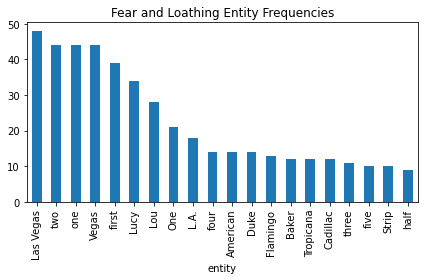

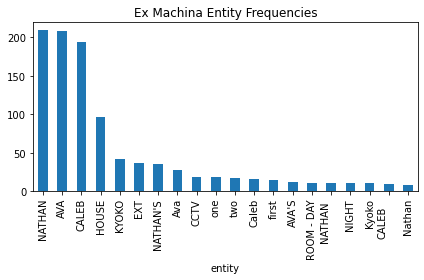

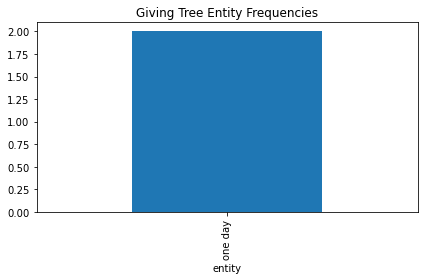

In [13]:
"""Part 5 b
Produce a bar plot for each document that includes the count for the 20 most common named entities (by name)."""

# Get a list of each entity occurence by name for each document
fear_text_ent_list = [entity.text for entity in fear_doc.ents]
machina_text_ent_list = [entity.text for entity in machina_doc.ents]
tree_text_ent_list = [entity.text for entity in tree_doc.ents]

# Use a Counter on each list
fear_top20_ents = Counter(fear_text_ent_list).most_common()[:20]
machina_top20_ents = Counter(machina_text_ent_list).most_common()[:20]
tree_top20_ents = Counter(tree_text_ent_list).most_common()[:20]

# Get dataframes of the sorted counters
fear_top20_df = pd.DataFrame(fear_top20_ents, columns=['entity', 'count'])
machina_top20_df = pd.DataFrame(machina_top20_ents, columns=['entity', 'count'])
tree_top20_df = pd.DataFrame(tree_top20_ents, columns=['entity', 'count'])

# Plot and show the bar graphs
fear_top20_df.plot.bar(x='entity', y='count', legend=False)
plt.title("Fear and Loathing Entity Frequencies")
plt.gcf().tight_layout()

machina_top20_df.plot.bar(x='entity', y='count', legend=False)
plt.title("Ex Machina Entity Frequencies")
plt.gcf().tight_layout()

# Note the giving tree is short and only has 1 entity
# that occurs twice
tree_top20_df.plot.bar(x='entity', y='count', legend=False)
plt.title("Giving Tree Entity Frequencies")
plt.gcf().tight_layout()

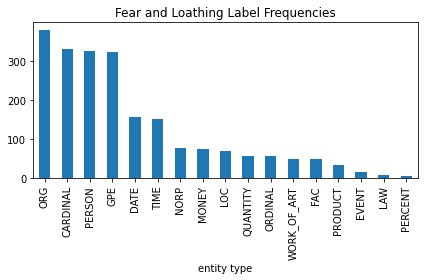

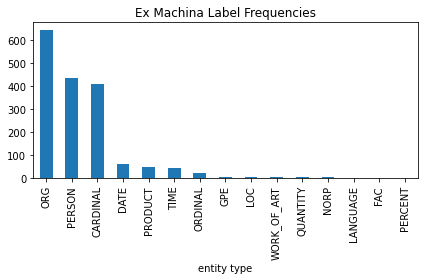

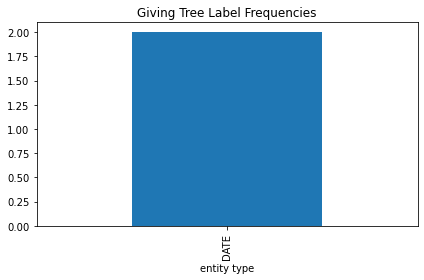

In [14]:
"""Part 5 c
Produce a second bar plot per document based on the counts of every named entity type (PERSON, ORG, etc.)"""

# Get a list of each entity's label for each document
fear_lbl_ent_list = [entity.label_ for entity in fear_doc.ents]
machina_lbl_ent_list = [entity.label_ for entity in machina_doc.ents]
tree_lbl_ent_list = [entity.label_ for entity in tree_doc.ents]

# Use a Counter on each list
fear_lbl_ents = Counter(fear_lbl_ent_list).most_common()
machina_lbl_ents = Counter(machina_lbl_ent_list).most_common()
tree_lbl_ents = Counter(tree_lbl_ent_list).most_common()

# Get dataframes of the sorted counters
fear_lbl_df = pd.DataFrame(fear_lbl_ents, columns=['entity type', 'count'])
machina_lbl_df = pd.DataFrame(machina_lbl_ents, columns=['entity type', 'count'])
tree_lbl_df = pd.DataFrame(tree_lbl_ents, columns=['entity type', 'count'])

# Plot and show the bar graphs
fear_lbl_df.plot.bar(x='entity type', y='count', legend=False)
plt.title("Fear and Loathing Label Frequencies")
plt.gcf().tight_layout()

machina_lbl_df.plot.bar(x='entity type', y='count', legend=False)
plt.title("Ex Machina Label Frequencies")
plt.gcf().tight_layout()

# Note the giving tree is short and only has 1 entity
# that occurs twice
tree_lbl_df.plot.bar(x='entity type', y='count', legend=False)
plt.title("Giving Tree Label Frequencies")
plt.gcf().tight_layout()

In [15]:
"""Part 5 d
Do you notice any meaningful differences (or similarities) among the documents wrt to these plots? If so, explain what they are."""

# This will be in the report

'Part 5 d\nDo you notice any meaningful differences (or similarities) among the documents wrt to these plots? If so, explain what they are.'